In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib as jb
from lightgbm import LGBMRegressor
import math
import cv2
import matplotlib.patches as mpatches
import colorsys

# Visualization - Bands and CSPM

In [97]:
data_path = '../data/generated_baseline/bands_cspm/'
charts_path = '../charts/error_visualization/baseline_bands_cspm_low_var/'

In [98]:
train_data = jb.load(f'{data_path}train_data_bands_cspm_baseline_low_var_filter.pkl.z')
train_data

,b1,b5,b6,cspmb7,z,x,y,z
1,0.1199,0.0490,0.0316,23.382784,3.273030,233,1131,3.273030
2,0.1199,0.0488,0.0324,23.158824,3.299687,233,1132,3.299687
4,0.1196,0.0489,0.0323,23.607309,3.278125,233,1134,3.278125
6,0.1196,0.0485,0.0317,24.852202,3.353030,233,1136,3.353030
7,0.1196,0.0485,0.0317,24.852202,3.381500,233,1137,3.381500
...,...,...,...,...,...,...,...,...
19280,0.1267,0.0473,0.0290,21.169079,2.594444,2292,85,2.594444
19281,0.1267,0.0473,0.0290,21.169079,2.428621,2293,85,2.428621
19282,0.1267,0.0475,0.0308,23.047057,2.264000,2293,86,2.264000
19284,0.1267,0.0482,0.0295,23.945153,1.539000,2295,86,1.539000


In [99]:
val_data = jb.load(f'{data_path}val_data_bands_cspm_baseline_low_var_filter.pkl.z')
val_data

,b1,b5,b6,cspmb7,z,x,y,rf_pred,lgbm_pred
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.222788,3.253044
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.306878,3.277826
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.206168,3.640472
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.542534,3.519446
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.878162,4.184618
...,...,...,...,...,...,...,...,...,...
19262,0.1278,0.0474,0.0288,22.935431,4.471071,2281,78,7.281293,5.725309
19275,0.1256,0.0438,0.0280,21.717054,3.169375,2289,83,3.969376,7.240660
19276,0.1256,0.0436,0.0275,20.408150,3.026562,2290,83,8.460267,8.530231
19283,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,3.069145,5.053403


In [100]:
val_data['z_pred'] = val_data['rf_pred']
val_data.drop(['rf_pred', 'lgbm_pred'], axis=1, inplace=True)
val_data.head()

,b1,b5,b6,cspmb7,z,x,y,z_pred
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.222788
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.306878
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.206168
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.542534
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.878162


In [101]:
df_data = val_data
df_data['error'] = df_data['z_pred'] - df_data['z']
df_data['abs_error'] = abs(df_data['error'])

In [102]:
df_data

,b1,b5,b6,cspmb7,z,x,y,z_pred,error,abs_error
0,0.1199,0.0490,0.0316,23.382784,3.195862,233,1130,3.222788,0.026926,0.026926
3,0.1199,0.0488,0.0324,23.158824,3.268182,233,1133,3.306878,0.038696,0.038696
5,0.1196,0.0489,0.0323,23.607309,3.294375,233,1135,3.206168,-0.088207,0.088207
8,0.1224,0.0554,0.0345,28.922021,2.230000,234,1003,2.542534,0.312534,0.312534
14,0.1223,0.0535,0.0338,27.742739,2.258305,234,1009,2.878162,0.619857,0.619857
...,...,...,...,...,...,...,...,...,...,...
19262,0.1278,0.0474,0.0288,22.935431,4.471071,2281,78,7.281293,2.810221,2.810221
19275,0.1256,0.0438,0.0280,21.717054,3.169375,2289,83,3.969376,0.800001,0.800001
19276,0.1256,0.0436,0.0275,20.408150,3.026562,2290,83,8.460267,5.433705,5.433705
19283,0.1267,0.0482,0.0295,23.945153,1.909714,2294,86,3.069145,1.159431,1.159431


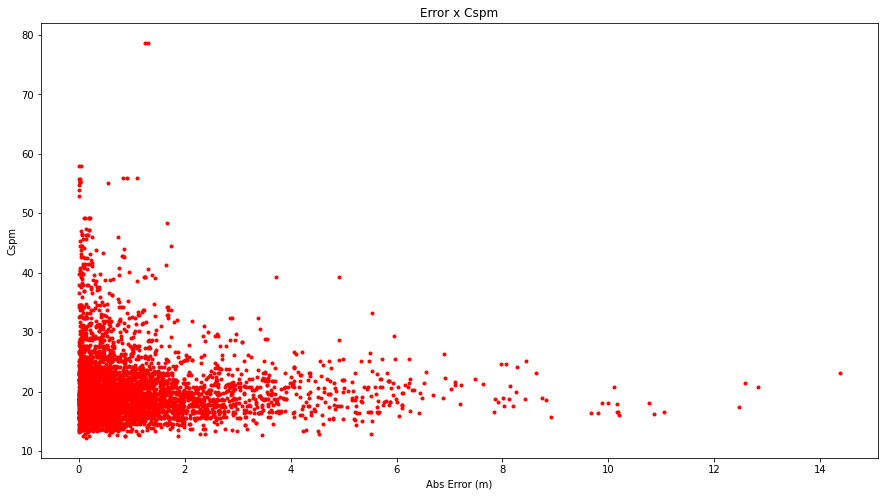

In [103]:
plt.figure(figsize=(15,8))
plt.plot(df_data['abs_error'], df_data['cspmb7'], 'r.')
plt.xlabel("Abs Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_abs_error_x_cspm.jpg')
#plt.grid()
plt.show()

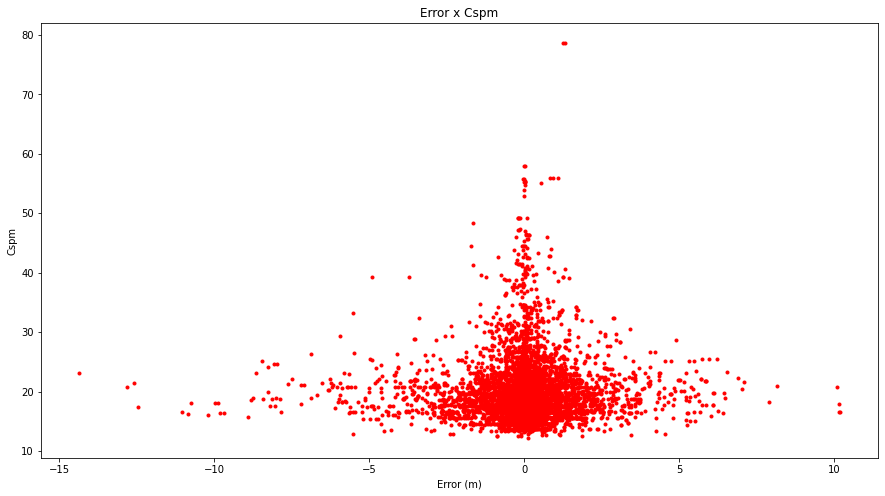

In [104]:
plt.figure(figsize=(15,8))
plt.plot(df_data['error'], df_data['cspmb7'], 'r.')
plt.xlabel("Error (m)")
plt.ylabel("Cspm")
plt.title('Error x Cspm')
plt.savefig(f'{charts_path}chart_error_x_cspm.jpg')
#plt.grid()
plt.show()

In [105]:
df_result = df_data.drop(['b1','b5','b6'],axis=1)

In [106]:
df_result['z_mean_rd'] = df_result['z'].apply(np.floor)

In [107]:
df_depth = df_result.drop(['x','y','z_pred','z'],axis=1).groupby('z_mean_rd').mean().reset_index()
df_depth.columns = ['depth_round_down','cspm','mean_error','mean_abs_error']
df_depth

,depth_round_down,cspm,mean_error,mean_abs_error
0,1.0,21.182297,1.055013,1.055651
1,2.0,21.723086,0.881556,0.895102
2,3.0,20.972719,0.692217,0.807467
3,4.0,21.100549,0.435985,0.708723
4,5.0,19.659353,0.103425,0.669428
5,6.0,19.002370,0.028326,0.744816
6,7.0,19.375164,-0.182967,0.788162
7,8.0,18.899857,-0.221283,0.892438
8,9.0,18.735024,-0.680601,1.032349
9,10.0,18.633894,-0.494283,1.130717


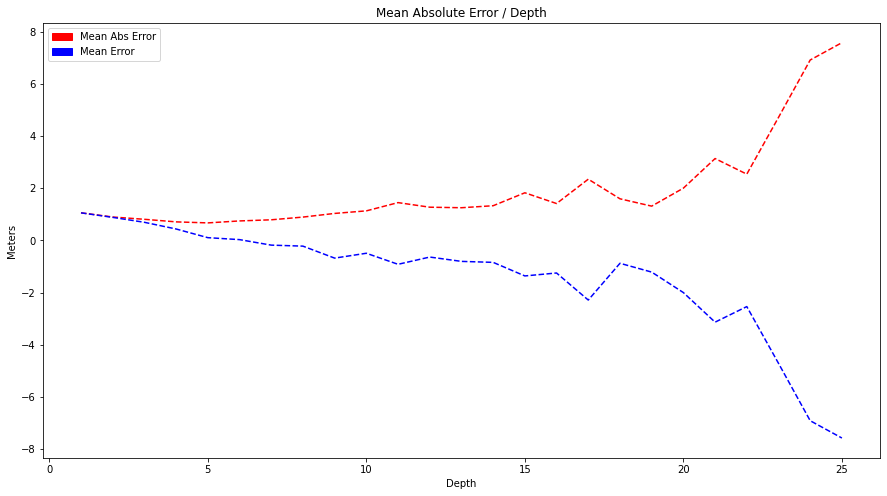

In [108]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['mean_abs_error'], 'r--', df_depth['depth_round_down'], df_depth['mean_error'], 'b--')
red = mpatches.Patch(color='red', label='Mean Abs Error')
blue = mpatches.Patch(color='blue', label='Mean Error')
plt.legend(handles=[red,blue])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_error.jpg')
plt.title('Mean Absolute Error / Depth')
#plt.grid()
plt.show()

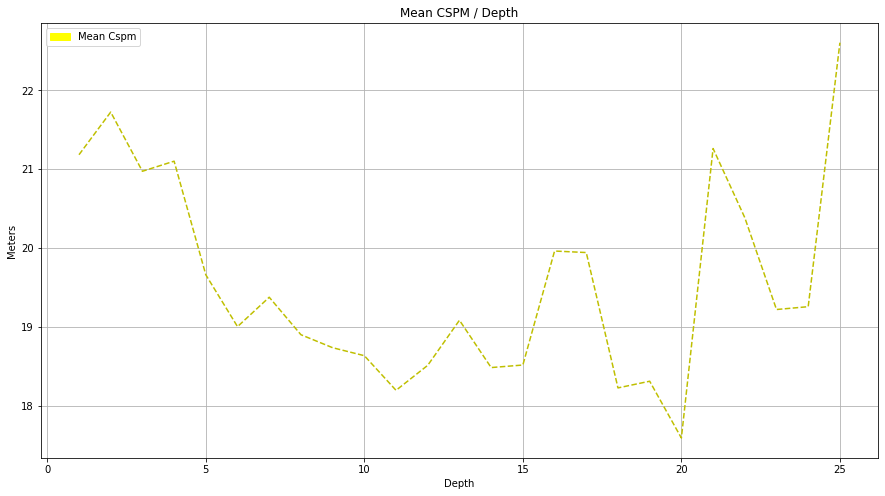

In [109]:
plt.figure(figsize=(15,8))
plt.plot(df_depth['depth_round_down'], df_depth['cspm'], 'y--')
yellow = mpatches.Patch(color='yellow', label='Mean Cspm')
plt.legend(handles=[yellow])
plt.xlabel("Depth")
plt.ylabel("Meters")
plt.savefig(f'{charts_path}chart_mean_cspm.jpg')
plt.title('Mean CSPM / Depth')
plt.grid()
plt.show()

In [110]:
base_image = cv2.imread(f'{charts_path}rgb_image.jpg')

In [111]:
transects_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = row[-5]
    y = row[-4]
    transects_image[y][x] = [255,255,255]
cv2.imwrite(f'{charts_path}bat_transects.jpg',transects_image)

True

In [112]:
abs_error_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    abs_error = row[-1]
    abs_error_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(abs_error/(df_data['abs_error'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}abs_error.jpg',cv2.cvtColor(abs_error_image, cv2.COLOR_BGR2RGB))

True

In [113]:
cspm_image = base_image.copy()
for i, row in enumerate(df_data.itertuples()):
    x = int(row[-5])
    y = int(row[-4])
    cspm = row[-7]
    cspm_image[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(cspm/(df_data['cspmb7'].max()*1.2), 0.5, 1))]

cv2.imwrite(f'{charts_path}cspm.jpg',cv2.cvtColor(cspm_image, cv2.COLOR_BGR2RGB))

True

In [114]:
def find_transect(x_s, y_s, x_e, y_e, df):
    transect = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[-5] # change this to dynamic 
        y = row[-4] # change this to dynamic 
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect.append(row)
    return transect
    

In [115]:
def find_transect2(x_s, y_s, x_e, y_e, df):
    transect_r = list()
    angle = math.atan2(y_s-y_e, x_s-x_e)
    low_x, high_x = (x_s, x_e) if x_s < x_e else (x_e, x_s)
    low_y, high_y = (y_s, y_e) if y_s < y_e else (y_e, y_s)
    df_t = df[(df['x'] >= low_x) & (df['x'] <= high_x)]
    df_t = df_t[(df_t['y'] >= low_y) & (df_t['y'] <= high_y)]
    for i, row in enumerate(df_t.itertuples()):
        x = row[-3] # change this to dynamic 
        y = row[-2] # change this to dynamic 
        angle2 = math.atan2(y-y_e,x-x_e)
        if abs(angle2 - angle) < 0.05:
            transect_r.append(row)
    return transect_r

In [116]:
def generate_transect_charts(df_data, coords, path, df_bat,image=None):
    transect = find_transect(coords[0],coords[1],coords[2],coords[3],df_data)
    bat_transect = find_transect2(coords[0],coords[1],coords[2],coords[3],df_bat)
    
    if image is not None:
        transect_image = image.copy()
        for i, row in enumerate(transect):
            x = row[-5] # Change this to dynamic
            y = row[-4] # change this to dynamic
            transect_image[y][x] = [0,255,0]

        cv2.imwrite(f'{path}bat_single_transect_{coords[0]}_{coords[1]}.jpg',transect_image)
    df_transect = pd.DataFrame(transect)
    #print(df_transect.head())
    #return None
    df_transect.drop(['Index'], axis=1, inplace=True)
    
    df_transect_bat = pd.DataFrame(bat_transect)
    #print(df_transect_bat.head())
    #return None
    df_transect_bat.drop(['Index'], axis=1, inplace=True)
   
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect_bat['x'],-df_transect_bat['z'], 'r.', df_transect['x'],-df_transect['z_pred'], 'b.')
    red = mpatches.Patch(color='red', label='Bathymetry')
    blue = mpatches.Patch(color='blue', label='Prediction')
    plt.legend(handles=[red,blue])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Depth(m)")
    plt.savefig(f'{path}chart_bat_pred_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['error'], 'g.')
    lbl = mpatches.Patch(color='green', label='Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_error_{coords[0]}_{coords[1]}.jpg')

    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['abs_error'], 'm.')
    lbl = mpatches.Patch(color='magenta', label='Abs Error')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Meter")
    plt.savefig(f'{path}chart_abs_error_{coords[0]}_{coords[1]}.jpg')
    
    plt.figure(figsize=(15,8))
    plt.plot(df_transect['x'],df_transect['cspmb7'], 'y.')
    lbl = mpatches.Patch(color='yellow', label='Cspm')
    plt.legend(handles=[lbl])
    plt.xlabel("Pixel X Coord")
    plt.ylabel("Cspm")
    plt.savefig(f'{path}cspm_{coords[0]}_{coords[1]}.jpg')


In [117]:
transect_coords = [[510,410,680,310],
                   [1604,142,1772,440],
                   [871,1123,1190,939],
                   [1020,705,1319,532]]

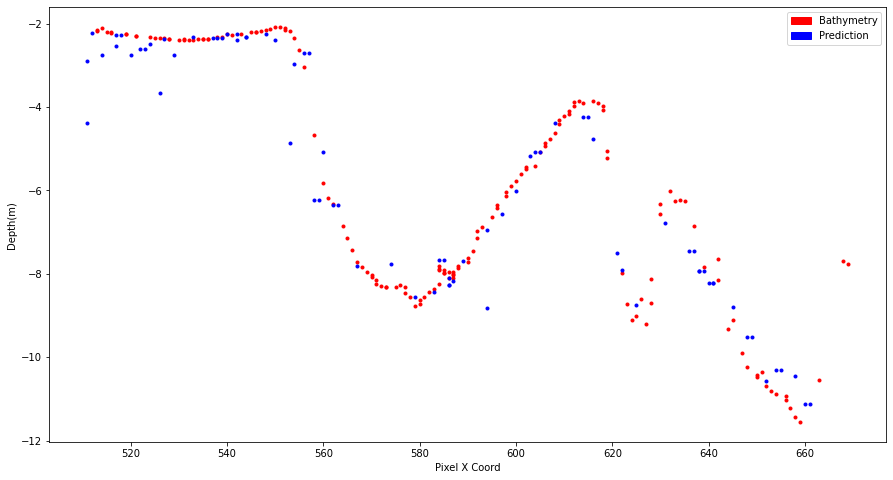

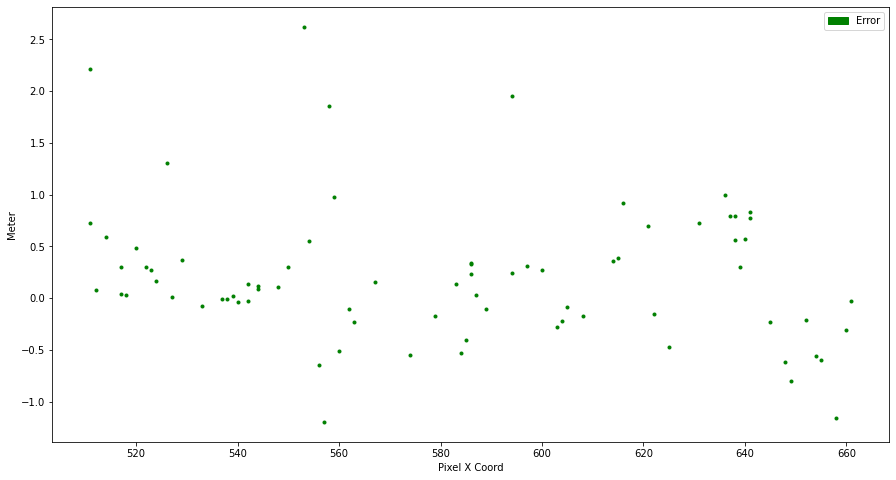

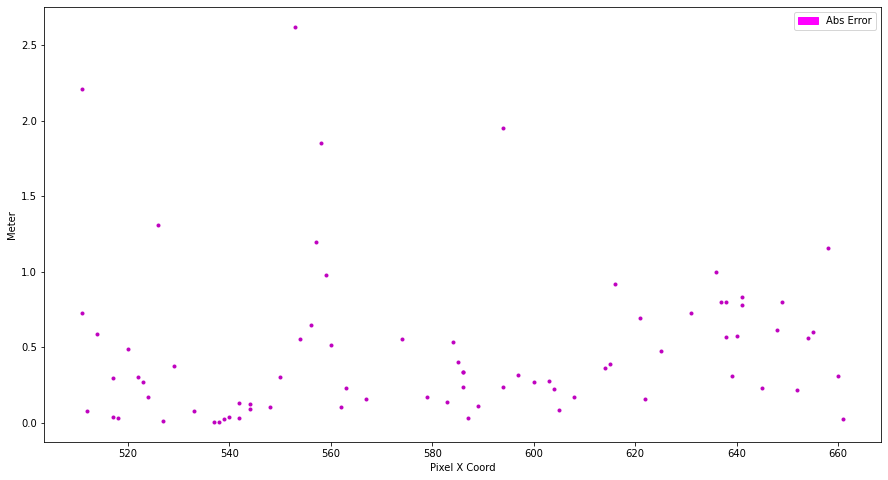

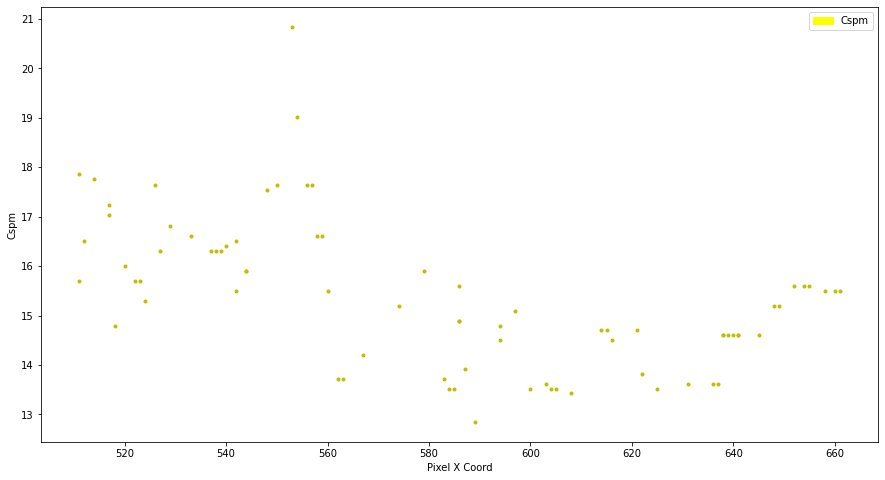

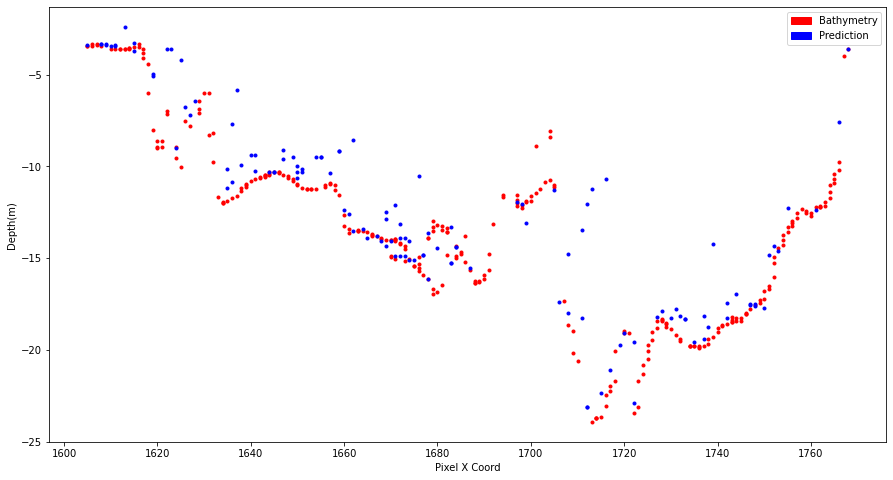

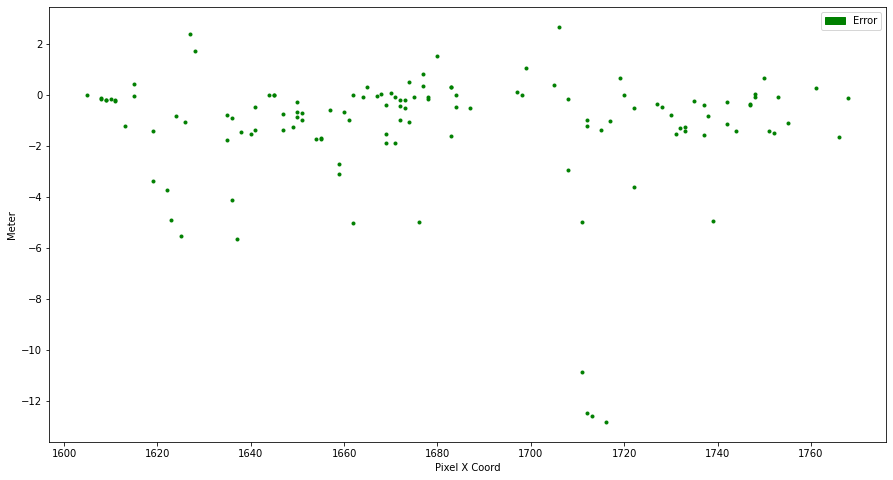

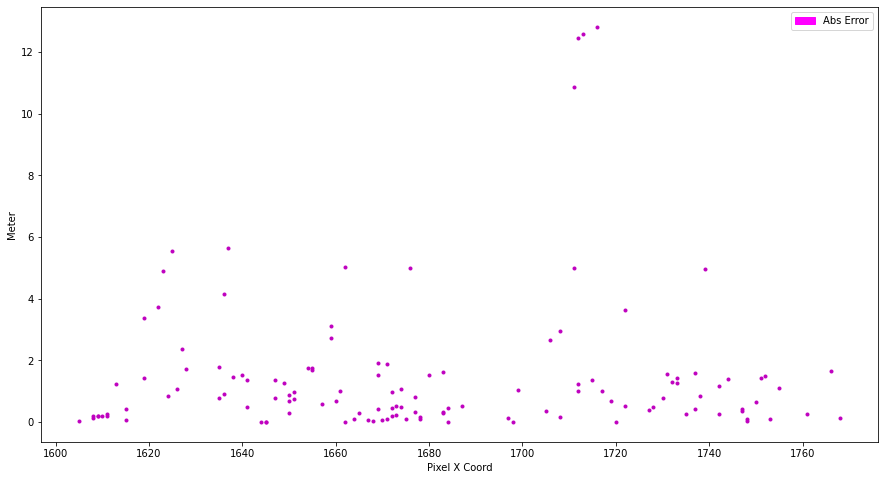

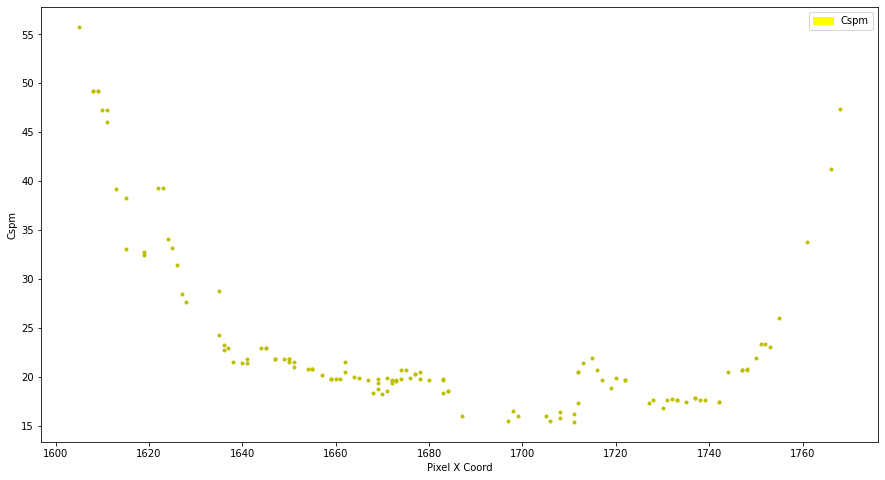

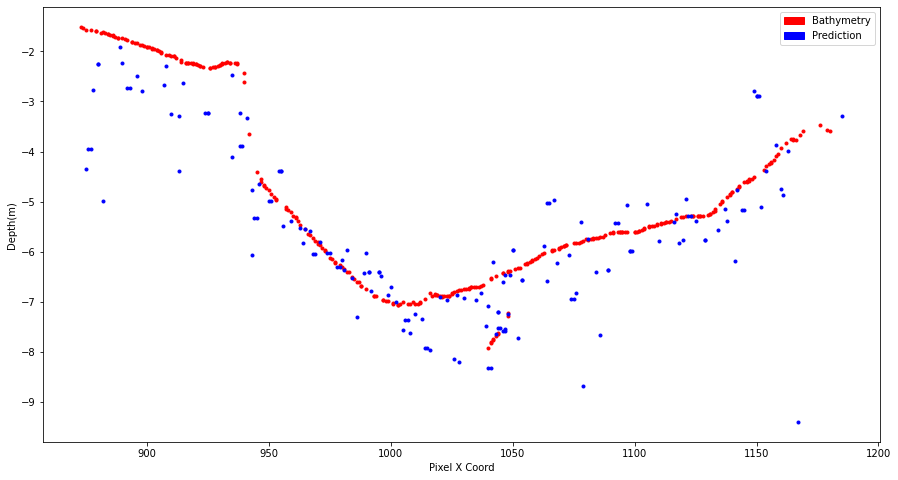

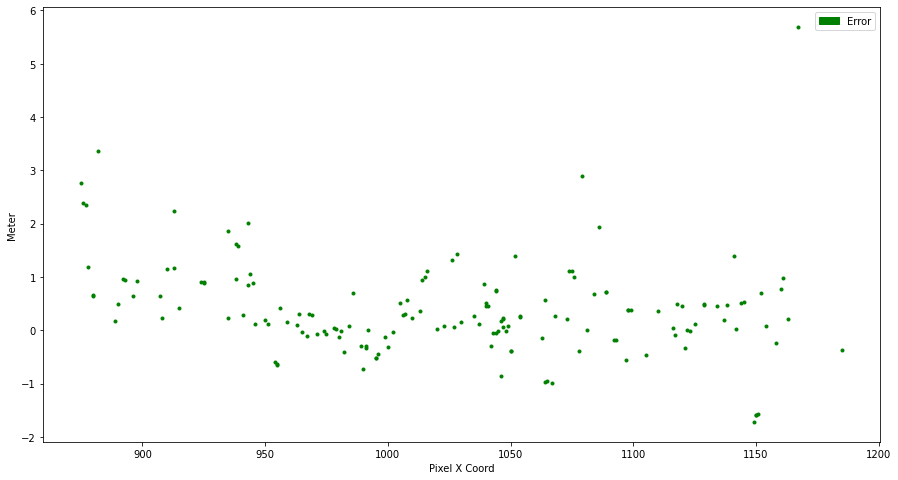

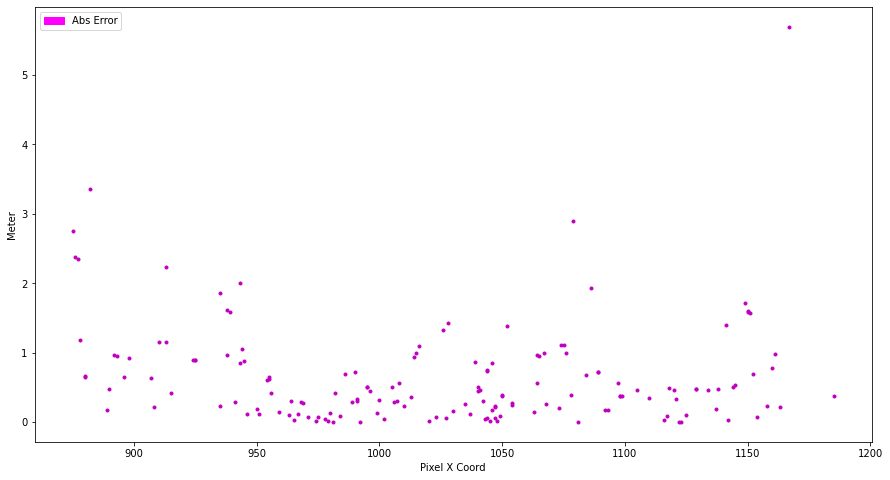

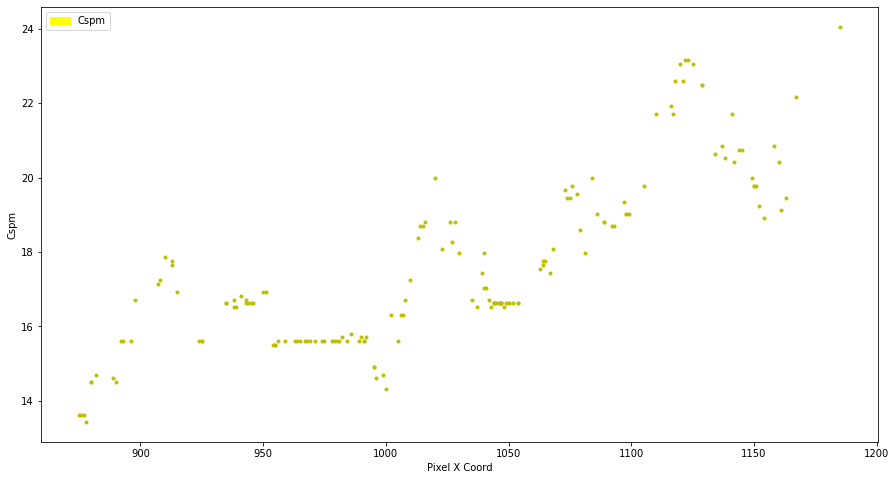

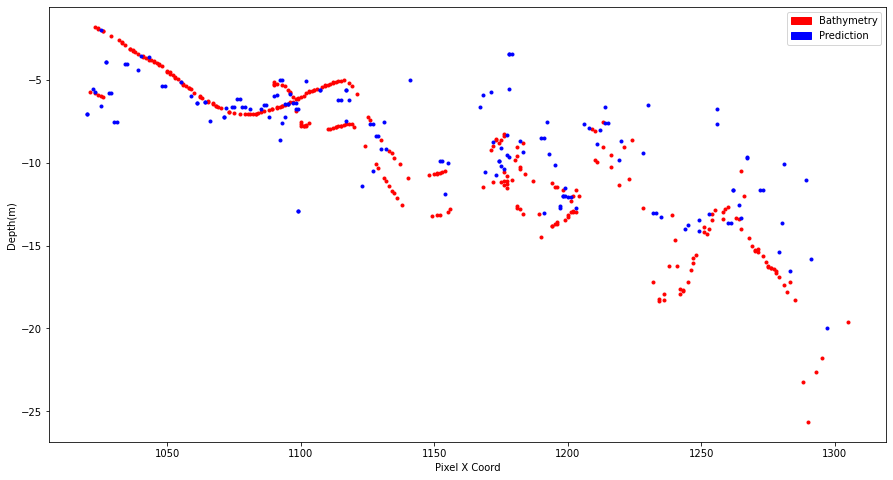

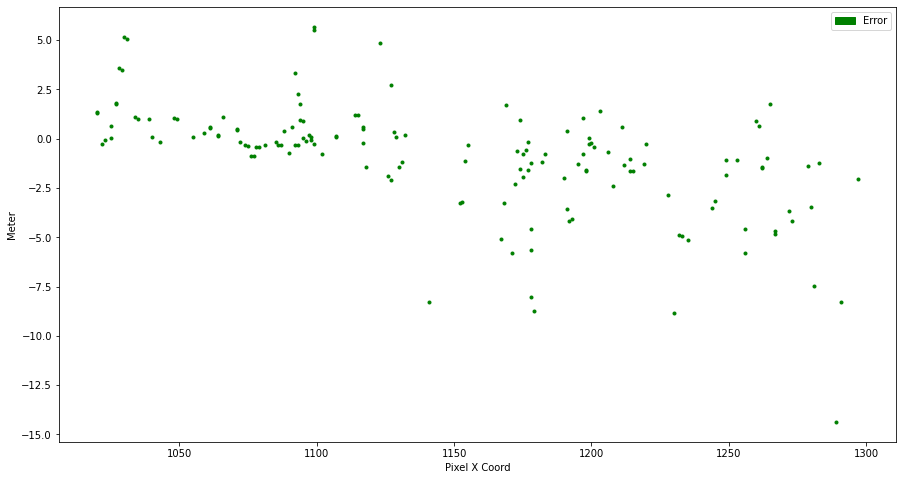

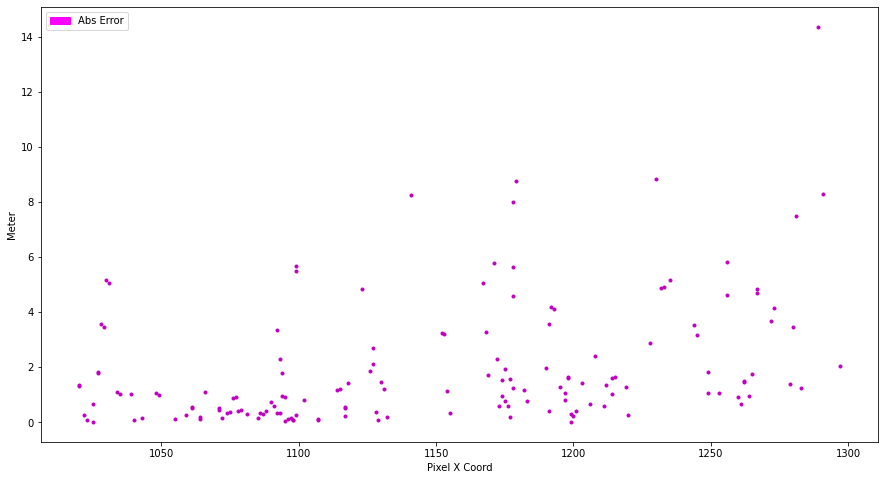

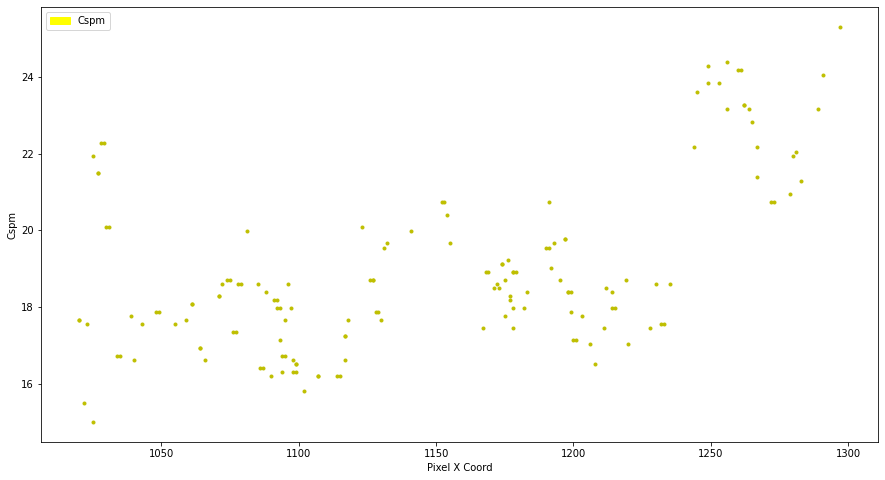

In [118]:
for i, coords in enumerate(transect_coords):
    generate_transect_charts(df_data, coords, charts_path, train_data, transects_image)